# Machine learning for sentiment classification on movie reviews


In [1]:
# load common librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and prepare data

In [2]:
# preprocessing: prepare data
col_names = ['content', 'label']
pos = pd.DataFrame(columns = col_names)
neg = pd.DataFrame(columns = col_names)

import os
# add positive samples to the DataFrame structure
i=1
for fend in os.listdir('./dataset1/pos/'):
    #data = pd.read_csv('./dataset1/pos/'+fend, sep = None, header = None)
    file = open('./dataset1/pos/'+fend, 'r')
    data = file.read()
    #print(data)
    file.close()
    pos = pos.append(pd.DataFrame({'content':[data], 'label':int(1)}, index=[i]))
    i+=1
# add negative samples to the DataFrame structure
i=1
for fend in os.listdir('./dataset1/neg/'):
    #data = pd.read_csv('./dataset1/neg/'+fend, sep = None, header = None)
    file = open('./dataset1/neg/'+fend, 'r')
    data = file.read()
    file.close()
    neg = neg.append(pd.DataFrame({'content':[data],'label':int(-1)}, index=[i]))
    i+=1

print('done')
print('number of positive samples: {} '.format(len(pos)))
print('number of negative samples: {} '.format(len(neg)))

done
number of positive samples: 1000 
number of negative samples: 1000 


In [3]:
pos.head(10)

,content,label
1,films adapted from comic books have had plenty...,1
2,every now and then a movie comes along from a ...,1
3,you've got mail works alot better than it dese...,1
4,""" jaws "" is a rare film that grabs your atten...",1
5,moviemaking is a lot like being the general ma...,1
6,"on june 30 , 1960 , a self-taught , idealistic...",1
7,"apparently , director tony kaye had a major ba...",1
8,one of my colleagues was surprised when i told...,1
9,"after bloody clashes and independence won , lu...",1
10,the american action film has been slowly drown...,1


In [4]:
# concat positive and negative samples
reviews = pos.append(neg)
print(reviews.head(10))
print(reviews.tail(10))

                                              content label
1   films adapted from comic books have had plenty...     1
2   every now and then a movie comes along from a ...     1
3   you've got mail works alot better than it dese...     1
4    " jaws " is a rare film that grabs your atten...     1
5   moviemaking is a lot like being the general ma...     1
6   on june 30 , 1960 , a self-taught , idealistic...     1
7   apparently , director tony kaye had a major ba...     1
8   one of my colleagues was surprised when i told...     1
9   after bloody clashes and independence won , lu...     1
10  the american action film has been slowly drown...     1
                                                content label
991   man , this was one wierd movie . \nsimilar to ...    -1
992   the king and i , a warner brothers animated , ...    -1
993   synopsis : cro-magnon ayla loses her mother to...    -1
994   salaries of hollywood top actors are getting o...    -1
995   movies like six days , s

In [5]:
# convert label to a numerical variable
#reviews["label_num"] = reviews.label.map({"1":int(1), "-1":int(0)})
reviews["label_num"] = reviews['label'].astype(int)
reviews.label_num

1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
       ..
971    -1
972    -1
973    -1
974    -1
975    -1
976    -1
977    -1
978    -1
979    -1
980    -1
981    -1
982    -1
983    -1
984    -1
985    -1
986    -1
987    -1
988    -1
989    -1
990    -1
991    -1
992    -1
993    -1
994    -1
995    -1
996    -1
997    -1
998    -1
999    -1
1000   -1
Name: label_num, Length: 2000, dtype: int32

In [6]:
# define X (items) and y (labels)
X = reviews.content
y = reviews.label_num

In [7]:
# split randomly X and y into train and test sets (NB: always uses the same seed)
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)
print('number of train samples: {} '.format(len(X_train)))
print('number of test samples: {} '.format(len(X_test)))
print([X_train.head(10), y_train.head(10)])
print([X_test.head(10), y_test.head(10)])

number of train samples: 1500 
number of test samples: 500 
[651    james cmaeron's breakthrough feature was the f...
105    this is not a simple plan about finding a plan...
562    the seasoned capt . dudley smith ( james cromw...
644    in `enemy at the gates' , jude law is a gifted...
442    call me crazy , but i don't see saving private...
629    writer/director lawrence kasdan had a hand in ...
997    john boorman's " zardoz " is a goofy cinematic...
681    it is an understood passion and an understood ...
813    seen april 16 , 1999 at 10 p . m . at crossgat...
505    american pie 2 is filled with laughs . \nbut t...
Name: content, dtype: object, 651    1
105   -1
562    1
644    1
442    1
629   -1
997   -1
681    1
813    1
505   -1
Name: label_num, dtype: int32]
[675    look back at all the times in your life when t...
700    okay , i just don't know why , but i seem to b...
283    the premise of turbulence is i'm sure very fam...
316    synopsis : al simmons , top-notch assas

## Representing text as numerical data

In [8]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [9]:
# learn the "vocabulary" of the training data (occurs in-place)
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
# examine the fitted vocabulary
vocabulary = vect.get_feature_names()
print('number of words in the vocabulary: {} '.format(len(vocabulary)))
vocabulary

number of words in the vocabulary: 35152 


['00',
 '000',
 '0009f',
 '007',
 '00s',
 '03',
 '04',
 '05',
 '05425',
 '10',
 '100',
 '1000',
 '10000',
 '100m',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10s',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '113',
 '1138',
 '114',
 '115',
 '117',
 '118',
 '11th',
 '12',
 '121',
 '122',
 '123',
 '125',
 '126',
 '127',
 '1272',
 '128',
 '129',
 '1298',
 '13',
 '130',
 '1305',
 '132',
 '133',
 '135',
 '137',
 '138',
 '13th',
 '14',
 '143',
 '14th',
 '15',
 '150',
 '1500s',
 '151',
 '152',
 '153',
 '155',
 '1583',
 '15th',
 '16',
 '160',
 '1600',
 '1600s',
 '161',
 '167',
 '1692',
 '16mm',
 '16x9',
 '17',
 '170',
 '1700s',
 '1709',
 '172',
 '175',
 '1773',
 '1791',
 '1792',
 '1793',
 '1794',
 '1799',
 '17th',
 '18',
 '180',
 '1800',
 '1800s',
 '1812',
 '1830s',
 '1839',
 '1847',
 '1862',
 '1865',
 '1869',
 '1871',
 '1885',
 '1888',
 '189',
 '1896',
 '1898',
 '18s',
 '18th',
 '19',
 '1900',
 '1900s',
 '1903',
 '1912',
 '1914',
 '1916',
 '1919',
 '1920s',
 '1922'

In [11]:
# transform training data into a "document-term matrix'
X_train_dtm = vect.transform(X_train)
X_train_dtm

<1500x35152 sparse matrix of type '<class 'numpy.int64'>'
	with 495843 stored elements in Compressed Sparse Row format>

In [12]:
# examine the content of the sparse matrix
print(X_train_dtm)

  (0, 175)	5
  (0, 206)	3
  (0, 586)	1
  (0, 607)	3
  (0, 1062)	2
  (0, 1280)	3
  (0, 1330)	1
  (0, 1332)	1
  (0, 1348)	3
  (0, 1470)	1
  (0, 1509)	1
  (0, 1548)	13
  (0, 1659)	2
  (0, 1670)	1
  (0, 1760)	1
  (0, 1856)	1
  (0, 1919)	6
  (0, 1975)	1
  (0, 1995)	2
  (0, 2022)	1
  (0, 2024)	1
  (0, 2036)	1
  (0, 2076)	2
  (0, 2233)	3
  (0, 2461)	1
  :	:
  (1499, 34370)	1
  (1499, 34385)	4
  (1499, 34395)	1
  (1499, 34417)	1
  (1499, 34421)	1
  (1499, 34423)	1
  (1499, 34494)	1
  (1499, 34580)	1
  (1499, 34592)	9
  (1499, 34605)	1
  (1499, 34649)	1
  (1499, 34704)	1
  (1499, 34708)	1
  (1499, 34712)	1
  (1499, 34724)	2
  (1499, 34743)	1
  (1499, 34753)	1
  (1499, 34757)	1
  (1499, 34798)	1
  (1499, 34821)	2
  (1499, 34861)	1
  (1499, 34927)	2
  (1499, 34995)	18
  (1499, 35003)	7
  (1499, 35006)	1


In [13]:
# examine the vocabulary and document-term matrix together (X_train_dtm.toarray() converts sparse matrix to a dense matrix)
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

,00,000,0009f,007,00s,03,04,05,05425,10,...,zucker,zuehlke,zuko,zulu,zurg,zus,zweibel,zwick,zwigoff,zycie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<500x35152 sparse matrix of type '<class 'numpy.int64'>'
	with 165969 stored elements in Compressed Sparse Row format>

## Class prediction with Multinomial Naive Bayes

In [15]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [16]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 40.7 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

### Performance evaluation

In [18]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.806

In [19]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[198,  47],
       [ 50, 205]], dtype=int64)

In [20]:
# print reviews for the false positives
X_test[(y_pred_class==1) & (y_test==-1)]

211    the rich legacy of cinema has left us with cer...
822    it's difficult to expect much from a director ...
927    star wars : ? episode i -- the phantom menace ...
762    weighed down by tired plot lines and spielberg...
481    as any reasonable human being would , i must a...
87     lucas was wise to start his star wars trilogy ...
315    since director steven zaillian previously wrot...
238    there is a scene early in jakob the liar that ...
541    whether or not i would be considered a trekker...
244    i read the new yorker magazine and i enjoy som...
110    nearly every film tim burton has directed has ...
552    kate ( jennifer aniston ) is having some probl...
263    it's not a bad thing to update old stories . \...
603    by phil curtolo " madonna - antonio banderas -...
216    libby parsons ( ashley judd ) has the perfect ...
948    what were they thinking ? \nnostalgia for the ...
786    for a film touted as exploring relationships a...
268    i have always been a fan

In [21]:
# print reviews for the false negatives
X_test[(y_pred_class==-1) & (y_test==1)]

448    what is a scary movie anyhow ? \nis it a movie...
859    mike myers , you certainly did throw us a ? fr...
882    the word 'rest' in the title should be stresse...
283    ok , let's get one thing straight right away :...
694    let me first say that the conditions that i wa...
656    jacques tati's 1953 classic " les vacances de ...
127    i have to say it . \ntim burton's retelling of...
237    jerry springer has got nothing on " wild thing...
995    a thriller set in modern day seattle , that ma...
987    i think the first thing this reviewer should m...
701    let me start off by saying that leading up to ...
556    harmless , silly and fun comedy about dim-witt...
762    film adaptation of hunter s . thompson's infam...
349    bob the happy bastard's quickie review : \nthe...
481    the trailers and the beginning of the move sum...
511    are we victims of fate in life or can we creat...
390    when i left the theater after seeing david lyn...
988    trees lounge is the dire

In [22]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [23]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.8788955582232894

## Class prediction with logistic regression

In [24]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [25]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

C:\Programmes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 645 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

### Performance evaluation

In [27]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.842

In [28]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[211,  34],
       [ 45, 210]], dtype=int64)

In [29]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

In [30]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9123329331732692

## Class prediction with SVM

In [31]:
# import, instantiate and train a SVM model without probability estimation
from sklearn.svm import SVC
clf = SVC(kernel='linear')
%time clf.fit(X_train_dtm, y_train)

Wall time: 17 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
# make class predictions for X_test_dtm
y_pred_class = clf.predict(X_test_dtm)

### Performance evaluation

In [33]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.816

In [34]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[202,  43],
       [ 49, 206]], dtype=int64)

In [ ]:
# import, instantiate and train a SVM model with probability estimation
clf = SVC(kernel='linear', probability=True)
%time clf.fit(X_train_dtm, y_train)

In [ ]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = clf.predict_proba(X_test_dtm)[:, 1]

In [ ]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

### Find the best SVM parameters with grid search

In [49]:
# 1st step: large logarithmic grid search
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(0, 10, 6)
gamma_range = np.logspace(-9, -1, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

{'gamma': array([1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01]),
 'C': array([1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10])}

In [50]:
# operate grid search with default RBF kernel
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, return_train_score=True)
grid.fit(X_train_dtm, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01]), 'C': array([1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
# print results
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
scores

The best parameters are {'C': 10000.0, 'gamma': 1e-07} with a score of 0.80


array([[0.50333333, 0.50333333, 0.61533333, 0.72066667, 0.50466667],
       [0.50333333, 0.61866667, 0.79733333, 0.75266667, 0.50466667],
       [0.61866667, 0.804     , 0.79733333, 0.75266667, 0.50466667],
       [0.79533333, 0.79666667, 0.79733333, 0.75266667, 0.50466667],
       [0.74133333, 0.79666667, 0.79733333, 0.75266667, 0.50466667],
       [0.73733333, 0.79666667, 0.79733333, 0.75266667, 0.50466667]])

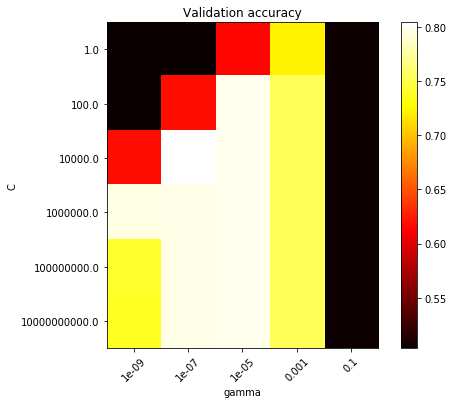

In [52]:
# draw heatmap
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [57]:
# 2nd step: precise logarithmic grid search on selected range
C_range = np.logspace(4, 8, 5)
gamma_range = np.logspace(-8, -4, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(kernel='linear'), param_grid=param_grid)
param_grid

{'gamma': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04]),
 'C': array([1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])}

In [58]:
# operate grid search with default RBF kernel
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, return_train_score=True)
grid.fit(X_train_dtm, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04]), 'C': array([1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
# print results
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
scores

The best parameters are {'C': 10000.0, 'gamma': 1e-07} with a score of 0.80


array([[0.73466667, 0.804     , 0.796     , 0.79733333, 0.80133333],
       [0.802     , 0.798     , 0.79666667, 0.79733333, 0.80133333],
       [0.796     , 0.79666667, 0.79666667, 0.79733333, 0.80133333],
       [0.794     , 0.79666667, 0.79666667, 0.79733333, 0.80133333],
       [0.794     , 0.79666667, 0.79666667, 0.79733333, 0.80133333]])

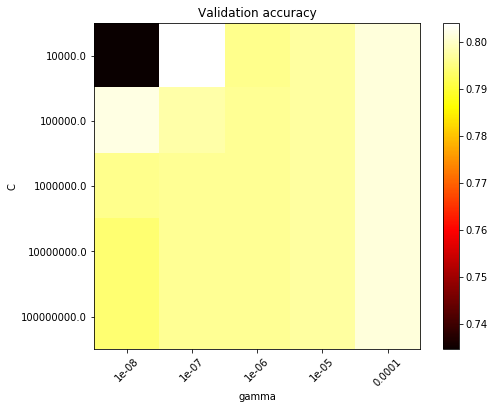

In [60]:
# draw heatmap
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()